#  **Productivity Prediction**

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **Exploratory Data Analysis**

In [127]:
df = pd.read_csv("..\Data\manufacturing_data.csv")
df.head(5)

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2/24/2015,Q4,Stitching Unit,Tuesday,Line-S1,0.6,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214
1,1/19/2015,Q3,Stitching Unit,Monday,Line-F3,0.8,11.41,1028.0,4380,50,0.0,0,No Style Change,31.0,0.800359
2,1/6/2015,Q1,Finishing & Quality,Tuesday,Line-C2,0.8,2.90,NaN,1440,0,0.0,0,No Style Change,8.0,0.681061
3,2/24/2015,Q4,Finishing & Quality,Tuesday,Line-S2,0.7,3.90,NaN,960,0,0.0,0,No Style Change,8.0,0.325000
4,1/4/2015,Q1,Finishing & Quality,Sunday,Line-C1,0.8,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.667604


In [128]:
print(f"Shape of the dataframe: {df.shape}")

Shape of the dataframe: (1197, 15)


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   recordDate           1197 non-null   object 
 1   fiscalQuarter        1197 non-null   object 
 2   productionDept       1197 non-null   object 
 3   dayOfWeek            1197 non-null   object 
 4   team                 1197 non-null   object 
 5   plannedEfficiency    1197 non-null   float64
 6   standardMinuteValue  1197 non-null   float64
 7   workInProgress       691 non-null    float64
 8   overtimeMinutes      1197 non-null   int64  
 9   performanceBonus     1197 non-null   int64  
 10  idleMinutes          1197 non-null   float64
 11  idleWorkers          1197 non-null   int64  
 12  styleChangeCount     1197 non-null   object 
 13  workerCount          1197 non-null   float64
 14  efficiencyScore      1197 non-null   float64
dtypes: float64(6), int64(3), object(6)
mem

In [130]:
print(df.isnull().sum())

recordDate               0
fiscalQuarter            0
productionDept           0
dayOfWeek                0
team                     0
plannedEfficiency        0
standardMinuteValue      0
workInProgress         506
overtimeMinutes          0
performanceBonus         0
idleMinutes              0
idleWorkers              0
styleChangeCount         0
workerCount              0
efficiencyScore          0
dtype: int64


In [131]:
df.describe()

,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,workerCount,efficiencyScore
count,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,34.609858,0.735091
std,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,22.197687,0.174488
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,57.000000,0.850253
max,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,89.000000,1.120437


In [132]:
df["productionDept"].value_counts()

productionDept
Stitching Unit           691
 Finishing & Quality     257
Finishing & Quality      249
Name: count, dtype: int64

In [133]:
df["productionDept"].unique()

array(['Stitching Unit', ' Finishing & Quality ', 'Finishing & Quality'],
      dtype=object)

In [134]:
df["fiscalQuarter"].value_counts()

fiscalQuarter
Q1    360
Q2    335
Q4    248
Q3    210
Q5     44
Name: count, dtype: int64

In [135]:
df[df["fiscalQuarter"]=='Q5']

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
30,1/31/2015,Q5,Stitching Unit,Saturday,Line-Q2,0.80,22.52,1116.0,6720,93,0.0,0,No Style Change,56.0,0.920237
33,1/29/2015,Q5,Finishing & Quality,Thursday,Line-P2,0.75,4.08,NaN,1080,0,0.0,0,No Style Change,9.0,0.634667
82,1/31/2015,Q5,Stitching Unit,Saturday,Line-S1,0.75,22.94,1502.0,6960,81,0.0,0,No Style Change,58.0,0.850362
86,1/31/2015,Q5,Stitching Unit,Saturday,Line-P1,0.65,20.10,1417.0,6480,49,0.0,0,No Style Change,54.0,0.650148
102,1/31/2015,Q5,Stitching Unit,Saturday,Line-S2,0.80,22.52,1397.0,6840,113,0.0,0,No Style Change,57.0,1.000230
146,1/31/2015,Q5,Stitching Unit,Saturday,Line-C2,0.50,23.54,1144.0,6480,0,0.0,0,No Style Change,54.0,0.286985
147,1/31/2015,Q5,Finishing & Quality,Saturday,Line-C1,0.70,3.94,NaN,1200,0,0.0,0,No Style Change,10.0,0.971867
191,1/29/2015,Q5,Stitching Unit,Thursday,Line-P1,0.60,20.10,1601.0,4320,46,0.0,0,No Style Change,51.0,0.600598
226,1/31/2015,Q5,Finishing & Quality,Saturday,Line-Q2,0.80,3.94,NaN,1200,0,0.0,0,No Style Change,10.0,0.971867
236,1/31/2015,Q5,Finishing & Quality,Saturday,Line-C2,0.65,3.94,NaN,960,0,0.0,0,No Style Change,8.0,0.971867


#### **`fiscalQuarter` : Is not quarter of the year , its just a portion of a week of the months , if a `month` has more than 4 week or say more than 28 days it then allocates the dates to `Q5`.It start week from months Day/Date 1**

In [136]:
len(df[df["fiscalQuarter"]=='Q5'])

44

In [137]:
df[df["fiscalQuarter"]=='Q4']

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2/24/2015,Q4,Stitching Unit,Tuesday,Line-S1,0.60,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214
3,2/24/2015,Q4,Finishing & Quality,Tuesday,Line-S2,0.70,3.90,NaN,960,0,0.0,0,No Style Change,8.0,0.325000
6,2/26/2015,Q4,Finishing & Quality,Thursday,Line-S1,0.50,3.94,NaN,3360,0,0.0,0,No Style Change,8.0,0.768847
7,2/28/2015,Q4,Finishing & Quality,Saturday,Line-S1,0.50,3.94,NaN,3360,0,0.0,0,No Style Change,8.0,0.768847
8,1/24/2015,Q4,Stitching Unit,Saturday,Line-C1,0.65,22.52,1295.0,10170,26,0.0,0,No Style Change,56.5,0.650417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,1/27/2015,Q4,Finishing & Quality,Tuesday,Line-F1,0.80,4.30,NaN,1440,0,0.0,0,No Style Change,12.0,0.940625
1180,2/26/2015,Q4,Finishing & Quality,Thursday,Line-P2,0.80,4.60,NaN,3780,0,0.0,0,No Style Change,9.0,0.590617
1181,1/22/2015,Q4,Finishing & Quality,Thursday,Line-F3,0.80,2.90,NaN,4800,0,0.0,0,No Style Change,8.0,0.626823
1186,2/22/2015,Q4,Finishing & Quality,Sunday,Line-Q1,0.80,3.94,NaN,2400,0,0.0,0,No Style Change,10.0,0.753525


In [138]:
import calendar

year = 2015
month = 1


cal = calendar.TextCalendar(calendar.SUNDAY)
month_calendar = cal.formatmonth(year, month)

print(month_calendar)

    January 2015
Su Mo Tu We Th Fr Sa
             1  2  3
 4  5  6  7  8  9 10
11 12 13 14 15 16 17
18 19 20 21 22 23 24
25 26 27 28 29 30 31



In [139]:
df['recordDate'] = pd.to_datetime(df['recordDate'])

march_records = df[df['recordDate'].dt.month == 3]
unique_march_dates = march_records['recordDate'].dt.date.unique()

print(unique_march_dates)

[datetime.date(2015, 3, 5) datetime.date(2015, 3, 4)
 datetime.date(2015, 3, 2) datetime.date(2015, 3, 9)
 datetime.date(2015, 3, 7) datetime.date(2015, 3, 11)
 datetime.date(2015, 3, 10) datetime.date(2015, 3, 1)
 datetime.date(2015, 3, 3) datetime.date(2015, 3, 8)]


In [140]:
df['dayOfWeek'].value_counts()

dayOfWeek
Wednesday    208
Sunday       203
Tuesday      201
Monday       199
Thursday     199
Saturday     187
Name: count, dtype: int64

#### **May be `Friday` is a `Day Off`**

In [141]:
df.describe()

,recordDate,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,workerCount,efficiencyScore
count,1197,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,2015-02-04 10:56:50.526315776,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,34.609858,0.735091
min,2015-01-01 00:00:00,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,2015-01-18 00:00:00,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,2015-02-03 00:00:00,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,2015-02-23 00:00:00,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,57.000000,0.850253
max,2015-03-11 00:00:00,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,89.000000,1.120437
std,NaN,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,22.197687,0.174488


#### **`overtimeMinutes`: max value `25920.00000` is a outlier because `25,920 minutes = 432 hours = 18 days`. I mean who can over time this long**

In [142]:
df[df['efficiencyScore']>1]

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
16,2015-02-12,Q2,Stitching Unit,Thursday,Line-S2,0.80,22.52,1327.0,0,113,0.0,0,No Style Change,57.5,1.000345
20,2015-02-11,Q2,Stitching Unit,Wednesday,Line-S1,0.80,22.52,1498.0,0,113,0.0,0,No Style Change,57.0,1.000066
27,2015-02-15,Q3,Stitching Unit,Sunday,Line-S1,0.80,22.52,1420.0,6840,113,0.0,0,No Style Change,57.0,1.000230
36,2015-02-11,Q2,Finishing & Quality,Wednesday,Line-F1,0.70,4.15,NaN,1800,0,0.0,0,No Style Change,15.0,1.033156
88,2015-02-02,Q1,Stitching Unit,Monday,Line-S1,0.80,22.94,16882.0,7020,113,0.0,0,No Style Change,58.5,1.000602
102,2015-01-31,Q5,Stitching Unit,Saturday,Line-S2,0.80,22.52,1397.0,6840,113,0.0,0,No Style Change,57.0,1.000230
197,2015-01-28,Q4,Stitching Unit,Wednesday,Line-S3,0.80,22.52,1350.0,6840,113,0.0,0,No Style Change,57.0,1.000230
218,2015-02-11,Q2,Finishing & Quality,Wednesday,Line-P2,0.80,4.08,NaN,1080,0,0.0,0,No Style Change,9.0,1.020000
229,2015-02-05,Q1,Stitching Unit,Thursday,Line-S2,0.80,22.52,1300.0,6780,113,0.0,0,No Style Change,56.5,1.000446
243,2015-02-12,Q2,Finishing & Quality,Thursday,Line-F1,0.70,4.15,NaN,1800,0,0.0,0,No Style Change,15.0,1.096633


In [143]:
df[df['workInProgress'].isnull()]

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
2,2015-01-06,Q1,Finishing & Quality,Tuesday,Line-C2,0.8,2.90,NaN,1440,0,0.0,0,No Style Change,8.0,0.681061
3,2015-02-24,Q4,Finishing & Quality,Tuesday,Line-S2,0.7,3.90,NaN,960,0,0.0,0,No Style Change,8.0,0.325000
4,2015-01-04,Q1,Finishing & Quality,Sunday,Line-C1,0.8,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.667604
6,2015-02-26,Q4,Finishing & Quality,Thursday,Line-S1,0.5,3.94,NaN,3360,0,0.0,0,No Style Change,8.0,0.768847
7,2015-02-28,Q4,Finishing & Quality,Saturday,Line-S1,0.5,3.94,NaN,3360,0,0.0,0,No Style Change,8.0,0.768847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,2015-01-27,Q4,Finishing & Quality,Tuesday,Line-C1,0.5,4.15,NaN,960,0,0.0,0,No Style Change,8.0,0.803542
1192,2015-03-03,Q1,Finishing & Quality,Tuesday,Line-F2,0.7,4.60,NaN,3360,0,0.0,0,No Style Change,8.0,0.354444
1193,2015-03-07,Q1,Finishing & Quality,Saturday,Line-F3,0.5,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.797500
1194,2015-03-09,Q2,Finishing & Quality,Monday,Line-F2,0.6,3.94,NaN,0,2880,0.0,0,No Style Change,12.0,0.864343


In [144]:
print(df.isnull().sum())

recordDate               0
fiscalQuarter            0
productionDept           0
dayOfWeek                0
team                     0
plannedEfficiency        0
standardMinuteValue      0
workInProgress         506
overtimeMinutes          0
performanceBonus         0
idleMinutes              0
idleWorkers              0
styleChangeCount         0
workerCount              0
efficiencyScore          0
dtype: int64


## **Univariate Analysis (Numerical Features)**

### **Histogram**

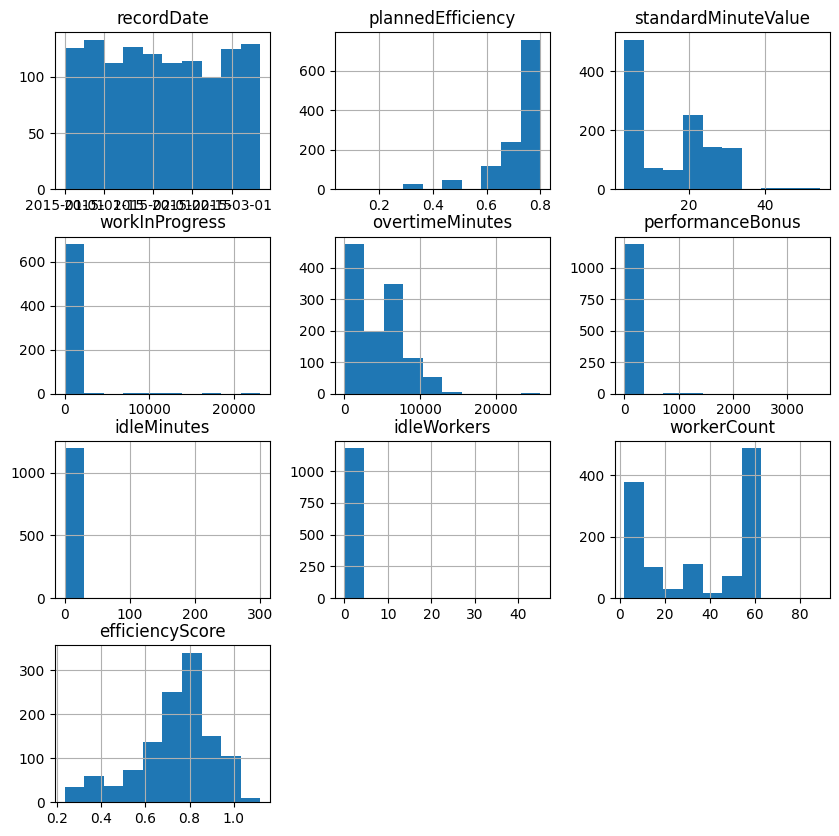

In [145]:
df.hist(figsize=(10,10))
plt.show()

### **Boxplot**

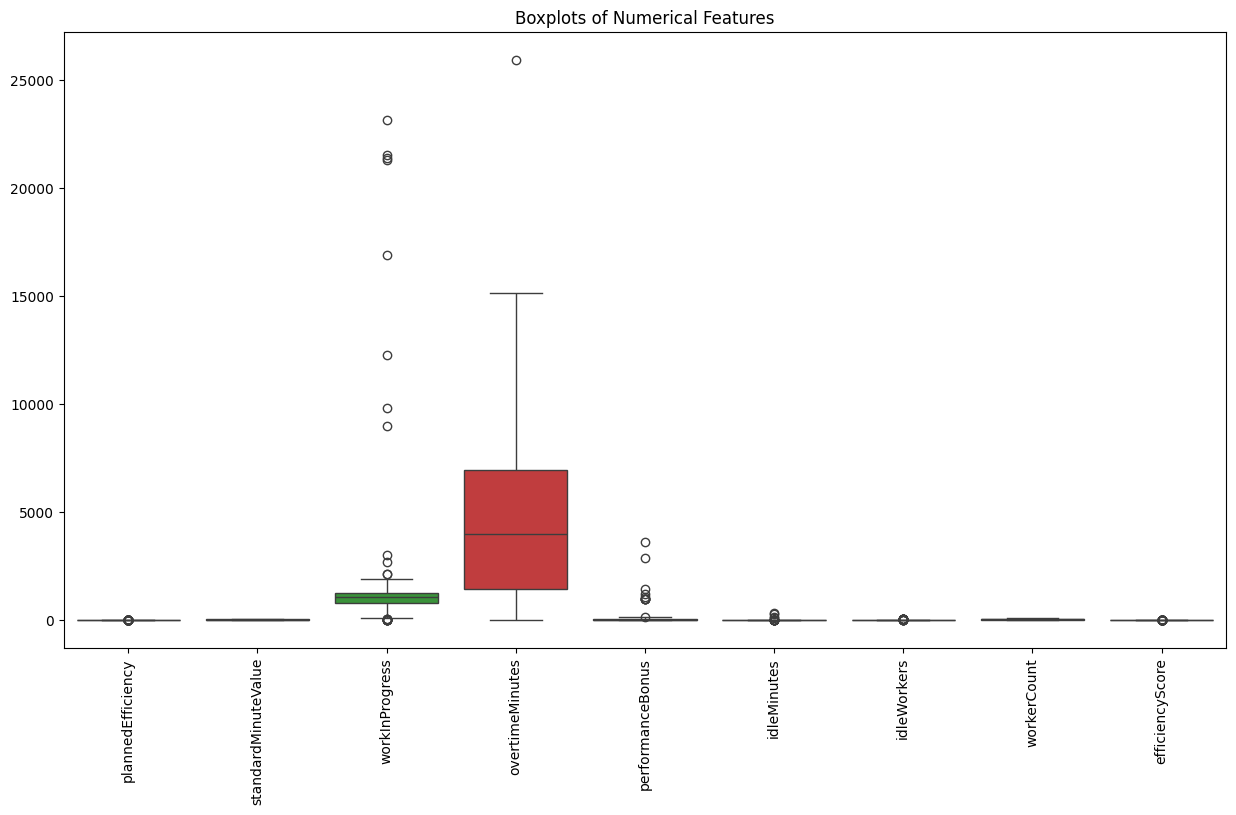

In [146]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.title("Boxplots of Numerical Features")
plt.show()

## **Univariate Analysis (Categorical Features)**

### **Bar-Plots**

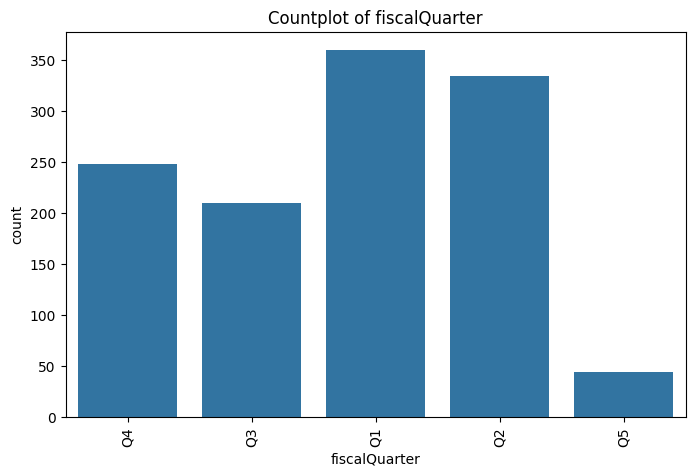

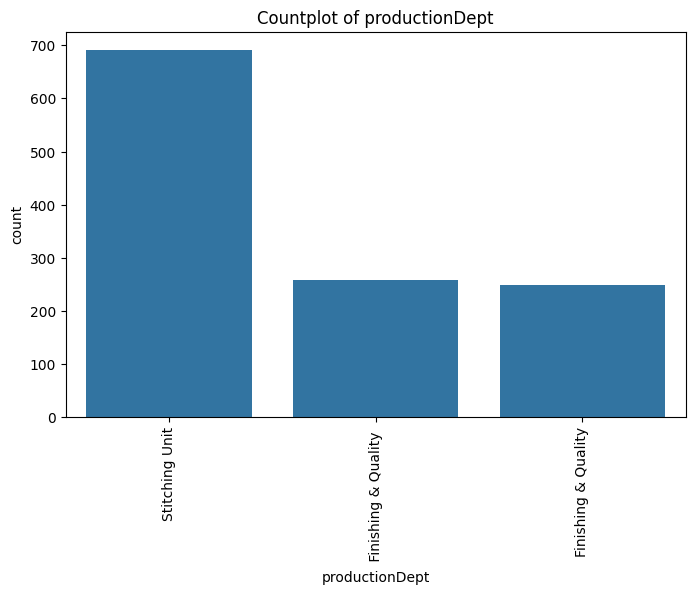

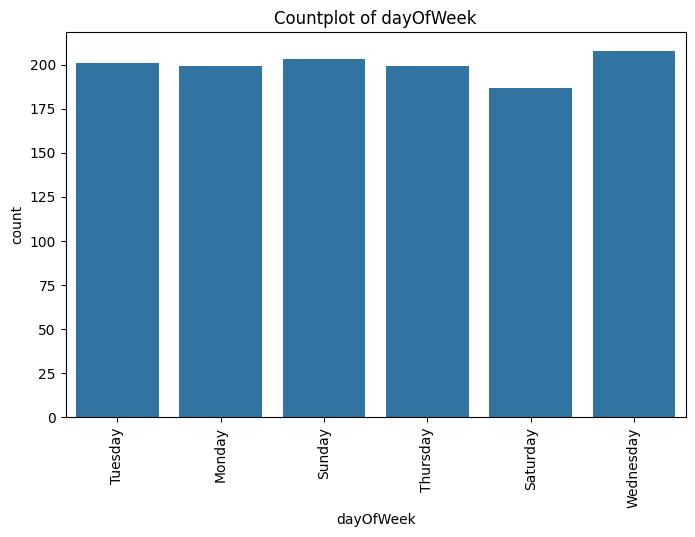

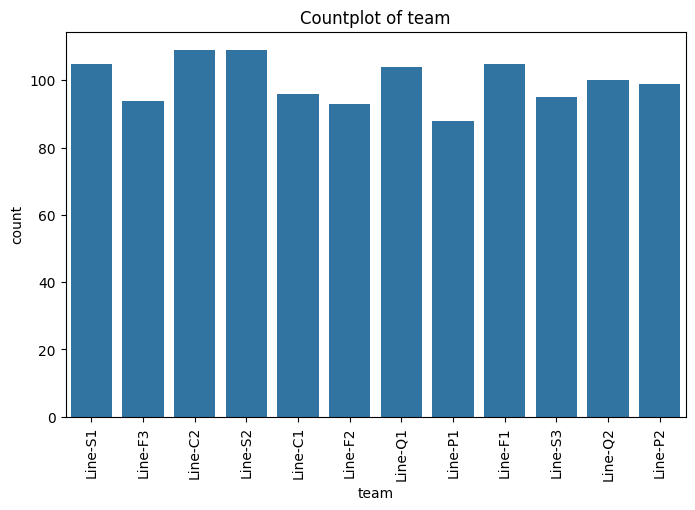

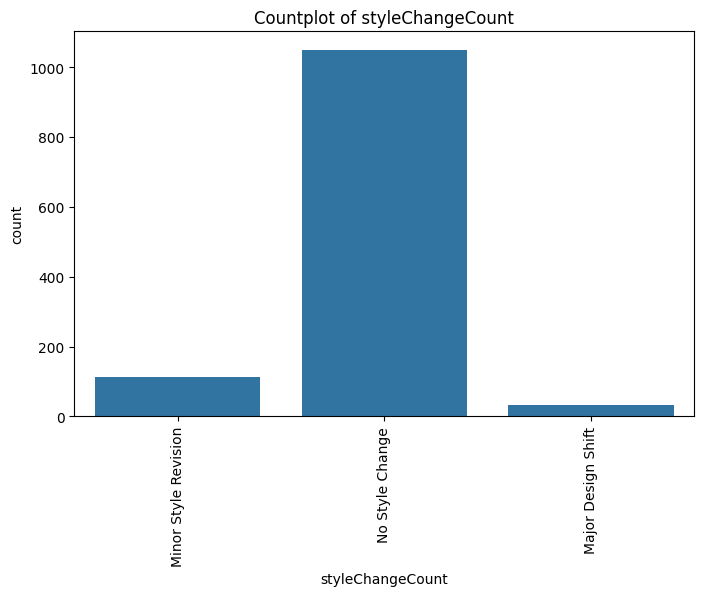

In [147]:
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=90)
    plt.show()

## **Bivariate Analysis**

### **Scatter plots (Numerical vs. Numerical)**

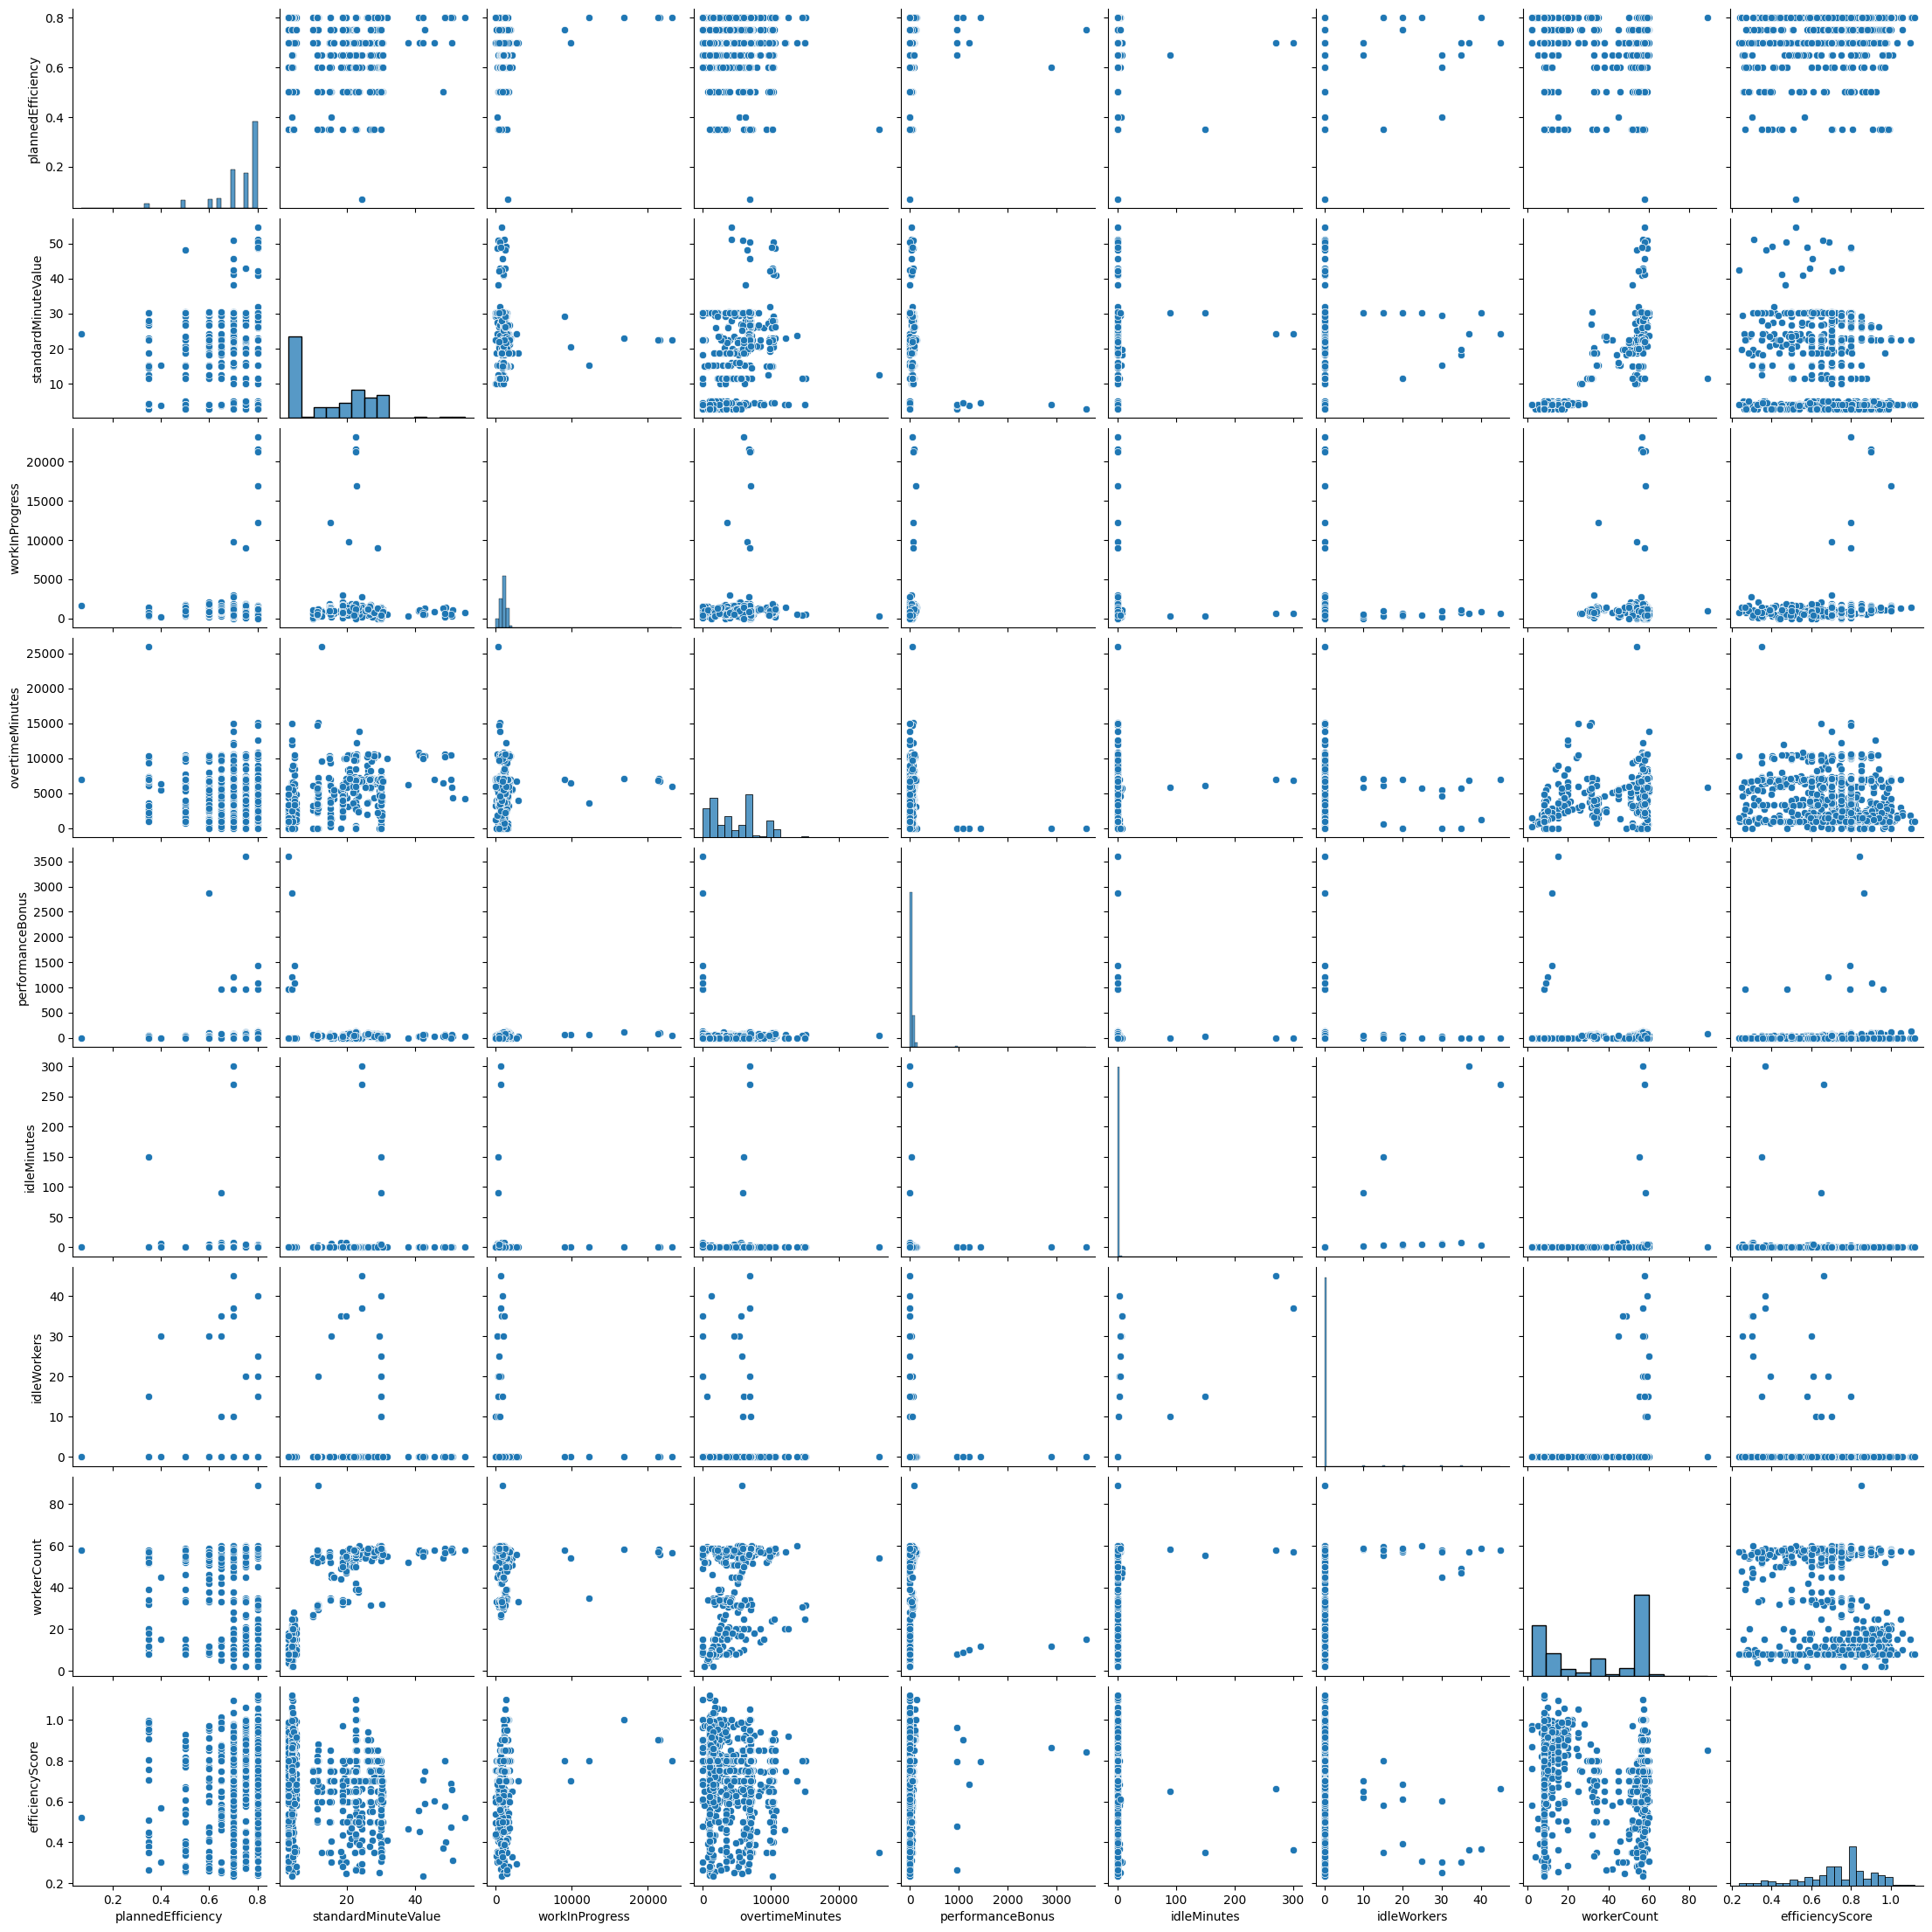

In [148]:
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()

### **Scatter plot with efficiencyScore**

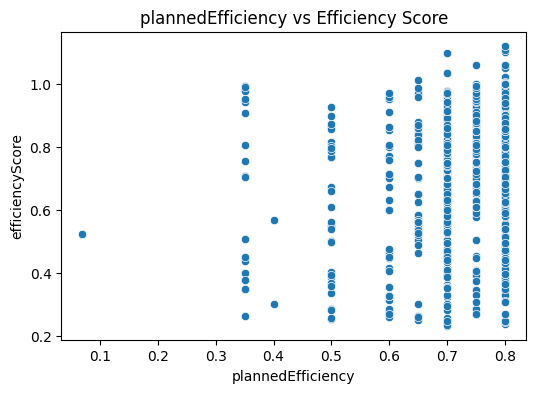

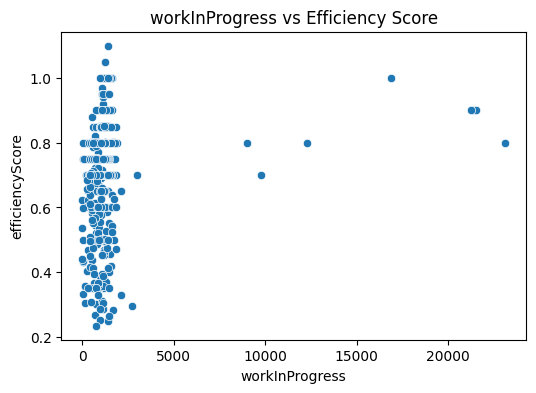

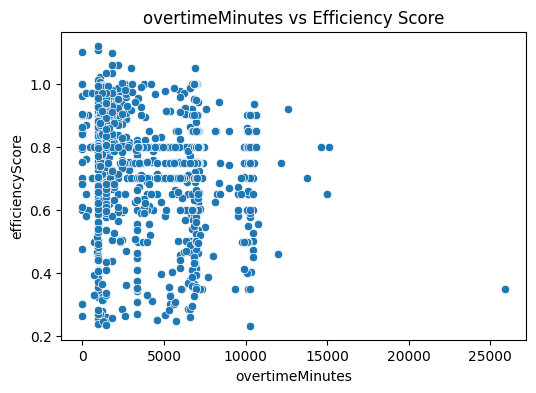

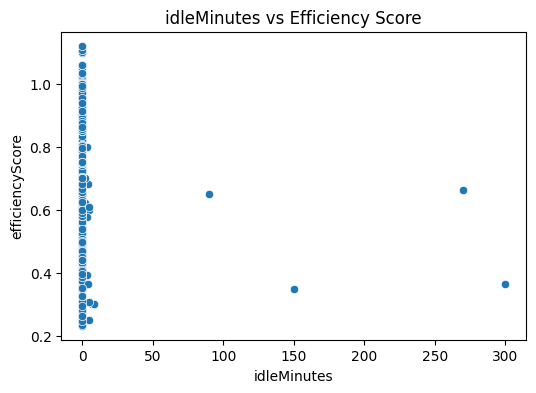

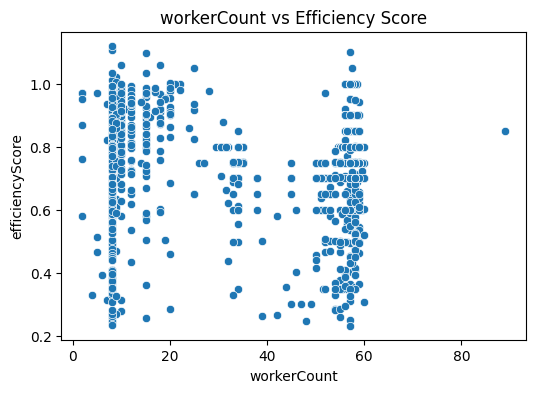

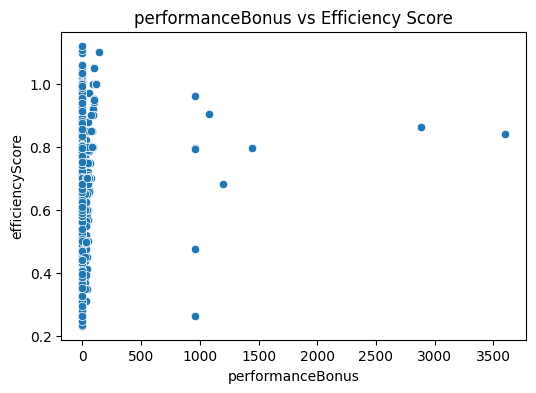

In [149]:
num_features = ['plannedEfficiency', 'workInProgress', 'overtimeMinutes', 'idleMinutes', 'workerCount','performanceBonus']

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['efficiencyScore'])
    plt.title(f"{col} vs Efficiency Score")
    plt.show()

In [150]:
print(len(df[(df['idleMinutes']>0)]))

18


In [151]:
print(len(df[(df['idleWorkers']>0)]))

18


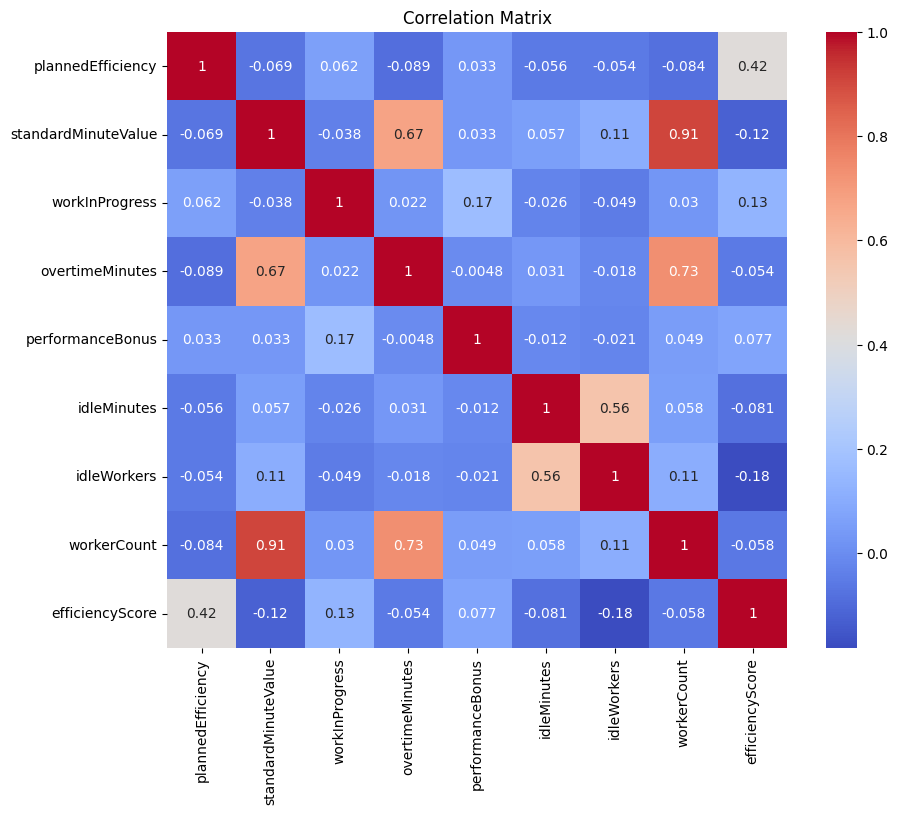

In [152]:
correlation_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### **DATA CLEANING**

In [153]:
df['productionDept'] = df['productionDept'].str.strip()

df['productionDept'] = df['productionDept'].replace({'Finishing & Quality': 'Finishing & Quality'})

print(df['productionDept'].value_counts())

productionDept
Stitching Unit         691
Finishing & Quality    506
Name: count, dtype: int64


In [154]:
691+506

1197

In [155]:
style_counts = df['styleChangeCount'].value_counts()
print(style_counts)

styleChangeCount
No Style Change         1050
Minor Style Revision     114
Major Design Shift        33
Name: count, dtype: int64


### **Compute correlation with efficiencyScore**

In [156]:
mapping = {
    'No Style Change': 0,
    'Minor Style Revision': 1,
    'Major Design Shift': 2
}
df['styleChangeEncoded'] = df['styleChangeCount'].map(mapping)

corr = df['styleChangeEncoded'].corr(df['efficiencyScore'])
print(f"Correlation between styleChangeCount and efficiencyScore: {corr}")

Correlation between styleChangeCount and efficiencyScore: -0.20736560728146441


In [157]:
df.head(5)

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore,styleChangeEncoded
0,2015-02-24,Q4,Stitching Unit,Tuesday,Line-S1,0.6,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214,1
1,2015-01-19,Q3,Stitching Unit,Monday,Line-F3,0.8,11.41,1028.0,4380,50,0.0,0,No Style Change,31.0,0.800359,0
2,2015-01-06,Q1,Finishing & Quality,Tuesday,Line-C2,0.8,2.90,NaN,1440,0,0.0,0,No Style Change,8.0,0.681061,0
3,2015-02-24,Q4,Finishing & Quality,Tuesday,Line-S2,0.7,3.90,NaN,960,0,0.0,0,No Style Change,8.0,0.325000,0
4,2015-01-04,Q1,Finishing & Quality,Sunday,Line-C1,0.8,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.667604,0


*   **Drop Date : Only 2 - 3 Months**
*   **Drop WorkInProgress : Only Finishing and Quality has NaN**
*   **Drop IdleMinutes and IdleWorkers : Only 18 values > 0**
*   **Drop StyleChangeCount : Weak correlation: -0.207 is a small negative correlation, so it’s not a strong predictor of efficiencyScore.**

In [158]:
df= df.drop(columns=['recordDate', 'workInProgress', 'idleMinutes', 'idleWorkers', 'styleChangeCount','styleChangeEncoded'])

print(df.columns)


Index(['fiscalQuarter', 'productionDept', 'dayOfWeek', 'team',
       'plannedEfficiency', 'standardMinuteValue', 'overtimeMinutes',
       'performanceBonus', 'workerCount', 'efficiencyScore'],
      dtype='object')


In [159]:
df.head(5)

,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,overtimeMinutes,performanceBonus,workerCount,efficiencyScore
0,Q4,Stitching Unit,Tuesday,Line-S1,0.6,22.53,5040,0,42.0,0.268214
1,Q3,Stitching Unit,Monday,Line-F3,0.8,11.41,4380,50,31.0,0.800359
2,Q1,Finishing & Quality,Tuesday,Line-C2,0.8,2.90,1440,0,8.0,0.681061
3,Q4,Finishing & Quality,Tuesday,Line-S2,0.7,3.90,960,0,8.0,0.325000
4,Q1,Finishing & Quality,Sunday,Line-C1,0.8,2.90,960,0,8.0,0.667604


### **Merge Q5 into Q4**

In [160]:
df['fiscalQuarter'] = df['fiscalQuarter'].replace({'Q5': 'Q4'})

print(df['fiscalQuarter'].value_counts())

fiscalQuarter
Q1    360
Q2    335
Q4    292
Q3    210
Name: count, dtype: int64


### **Map fiscal_quarters to Numbers**


In [161]:
quarter_mapping = {
    'Q1': 1,
    'Q2': 2,
    'Q3': 3,
    'Q4': 4
}
df['fiscalQuarter'] = df['fiscalQuarter'].map(quarter_mapping)

In [162]:
df.head(5)

,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,overtimeMinutes,performanceBonus,workerCount,efficiencyScore
0,4,Stitching Unit,Tuesday,Line-S1,0.6,22.53,5040,0,42.0,0.268214
1,3,Stitching Unit,Monday,Line-F3,0.8,11.41,4380,50,31.0,0.800359
2,1,Finishing & Quality,Tuesday,Line-C2,0.8,2.90,1440,0,8.0,0.681061
3,4,Finishing & Quality,Tuesday,Line-S2,0.7,3.90,960,0,8.0,0.325000
4,1,Finishing & Quality,Sunday,Line-C1,0.8,2.90,960,0,8.0,0.667604


In [163]:
df['fiscalQuarter'].value_counts()

fiscalQuarter
1    360
2    335
4    292
3    210
Name: count, dtype: int64

In [164]:
df[['fiscalQuarter']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   fiscalQuarter  1197 non-null   int64
dtypes: int64(1)
memory usage: 9.5 KB


In [165]:
df['fiscalQuarter']=df['fiscalQuarter'].astype('int')
df[['fiscalQuarter']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   fiscalQuarter  1197 non-null   int64
dtypes: int64(1)
memory usage: 9.5 KB


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fiscalQuarter        1197 non-null   int64  
 1   productionDept       1197 non-null   object 
 2   dayOfWeek            1197 non-null   object 
 3   team                 1197 non-null   object 
 4   plannedEfficiency    1197 non-null   float64
 5   standardMinuteValue  1197 non-null   float64
 6   overtimeMinutes      1197 non-null   int64  
 7   performanceBonus     1197 non-null   int64  
 8   workerCount          1197 non-null   float64
 9   efficiencyScore      1197 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 93.6+ KB


In [167]:
df['workerCount'].value_counts()

workerCount
8.0     262
58.0    114
57.0    109
59.0     75
10.0     60
       ... 
51.5      1
47.0      1
44.0      1
6.0       1
48.0      1
Name: count, Length: 61, dtype: int64

#### **How `Worker count` is in `float` : `half worker` ???? or may be `half day` , `short leave`**

### **Convert `workerCount` to `int`**

In [168]:
df['workerCount']=df['workerCount'].astype('int')
df['workerCount'].unique()

array([42, 31,  8, 59, 56, 52, 54, 20, 12, 57, 55, 58, 33, 10, 15, 50, 34,
       18,  9, 27, 38, 22, 25,  7, 19, 21, 89,  5, 14, 51, 16, 30, 60, 46,
       53, 32, 35, 45, 28, 49,  2,  4, 26, 29, 11, 24, 17, 47, 44,  6, 48,
       39])

In [169]:
df.head()

,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,overtimeMinutes,performanceBonus,workerCount,efficiencyScore
0,4,Stitching Unit,Tuesday,Line-S1,0.6,22.53,5040,0,42,0.268214
1,3,Stitching Unit,Monday,Line-F3,0.8,11.41,4380,50,31,0.800359
2,1,Finishing & Quality,Tuesday,Line-C2,0.8,2.90,1440,0,8,0.681061
3,4,Finishing & Quality,Tuesday,Line-S2,0.7,3.90,960,0,8,0.325000
4,1,Finishing & Quality,Sunday,Line-C1,0.8,2.90,960,0,8,0.667604


In [170]:
df['plannedEfficiency'].unique()

array([0.6 , 0.8 , 0.7 , 0.5 , 0.65, 0.75, 0.35, 0.4 , 0.07])

In [171]:
df['efficiencyScore'] = df['efficiencyScore'].round(2)
df['plannedEfficiency'] = df['plannedEfficiency'].round(2)

In [172]:
df.head()

,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,overtimeMinutes,performanceBonus,workerCount,efficiencyScore
0,4,Stitching Unit,Tuesday,Line-S1,0.6,22.53,5040,0,42,0.27
1,3,Stitching Unit,Monday,Line-F3,0.8,11.41,4380,50,31,0.80
2,1,Finishing & Quality,Tuesday,Line-C2,0.8,2.90,1440,0,8,0.68
3,4,Finishing & Quality,Tuesday,Line-S2,0.7,3.90,960,0,8,0.32
4,1,Finishing & Quality,Sunday,Line-C1,0.8,2.90,960,0,8,0.67


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fiscalQuarter        1197 non-null   int64  
 1   productionDept       1197 non-null   object 
 2   dayOfWeek            1197 non-null   object 
 3   team                 1197 non-null   object 
 4   plannedEfficiency    1197 non-null   float64
 5   standardMinuteValue  1197 non-null   float64
 6   overtimeMinutes      1197 non-null   int64  
 7   performanceBonus     1197 non-null   int64  
 8   workerCount          1197 non-null   int64  
 9   efficiencyScore      1197 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 93.6+ KB


In [174]:
df['team'].value_counts()

team
Line-S2    109
Line-C2    109
Line-S1    105
Line-F1    105
Line-Q1    104
Line-Q2    100
Line-P2     99
Line-C1     96
Line-S3     95
Line-F3     94
Line-F2     93
Line-P1     88
Name: count, dtype: int64

### **Create a mapping from team names to integer codes**


In [175]:
team_mapping = {
    'Line-S1': 1,
    'Line-S2': 2,
    'Line-S3': 3,
    'Line-C1': 4,
    'Line-C2': 5,
    'Line-F1': 6,
    'Line-F2': 7,
    'Line-F3': 8,
    'Line-Q1': 9,
    'Line-Q2': 10,
    'Line-P1': 11,
    'Line-P2': 12
}

df['team'] = df['team'].replace(team_mapping)

C:\Users\harsh\AppData\Local\Temp\ipykernel_22780\3577592394.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['team'] = df['team'].replace(team_mapping)


In [176]:
df.head()

,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,overtimeMinutes,performanceBonus,workerCount,efficiencyScore
0,4,Stitching Unit,Tuesday,1,0.6,22.53,5040,0,42,0.27
1,3,Stitching Unit,Monday,8,0.8,11.41,4380,50,31,0.80
2,1,Finishing & Quality,Tuesday,5,0.8,2.90,1440,0,8,0.68
3,4,Finishing & Quality,Tuesday,2,0.7,3.90,960,0,8,0.32
4,1,Finishing & Quality,Sunday,4,0.8,2.90,960,0,8,0.67


In [177]:
print(df['team'].dtype)

int64


In [178]:
df['productive'] = (df['efficiencyScore'] >= df['plannedEfficiency'])

In [179]:
df.sample(10,random_state=14)

,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,overtimeMinutes,performanceBonus,workerCount,efficiencyScore,productive
959,4,Finishing & Quality,Sunday,3,0.75,3.94,1620,0,9,0.96,True
464,1,Stitching Unit,Wednesday,3,0.80,29.40,6840,63,57,0.80,True
672,1,Finishing & Quality,Tuesday,6,0.70,3.94,3360,0,8,0.56,False
321,1,Stitching Unit,Sunday,8,0.65,18.79,3960,26,33,0.65,True
282,1,Stitching Unit,Thursday,12,0.80,11.41,3660,50,30,0.80,True
307,1,Finishing & Quality,Monday,2,0.80,3.94,960,0,8,0.80,True
609,4,Finishing & Quality,Wednesday,4,0.60,3.94,960,0,8,0.41,False
1123,3,Stitching Unit,Monday,12,0.80,15.26,3720,38,34,0.80,True
877,3,Finishing & Quality,Sunday,8,0.80,2.90,1800,0,10,0.80,True
950,4,Stitching Unit,Saturday,9,0.75,18.79,6240,45,52,0.75,True


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fiscalQuarter        1197 non-null   int64  
 1   productionDept       1197 non-null   object 
 2   dayOfWeek            1197 non-null   object 
 3   team                 1197 non-null   int64  
 4   plannedEfficiency    1197 non-null   float64
 5   standardMinuteValue  1197 non-null   float64
 6   overtimeMinutes      1197 non-null   int64  
 7   performanceBonus     1197 non-null   int64  
 8   workerCount          1197 non-null   int64  
 9   efficiencyScore      1197 non-null   float64
 10  productive           1197 non-null   bool   
dtypes: bool(1), float64(3), int64(5), object(2)
memory usage: 94.8+ KB


In [181]:
df['productionDept'].isna().any()

np.False_

In [182]:
df['productionDept'].unique()

array(['Stitching Unit', 'Finishing & Quality'], dtype=object)

In [183]:
df['productionDept'] = df['productionDept'].map({'Stitching Unit': 0, 'Finishing & Quality': 1}).astype('int64')


In [184]:
df.head(5)

,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,overtimeMinutes,performanceBonus,workerCount,efficiencyScore,productive
0,4,0,Tuesday,1,0.6,22.53,5040,0,42,0.27,False
1,3,0,Monday,8,0.8,11.41,4380,50,31,0.80,True
2,1,1,Tuesday,5,0.8,2.90,1440,0,8,0.68,False
3,4,1,Tuesday,2,0.7,3.90,960,0,8,0.32,False
4,1,1,Sunday,4,0.8,2.90,960,0,8,0.67,False


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fiscalQuarter        1197 non-null   int64  
 1   productionDept       1197 non-null   int64  
 2   dayOfWeek            1197 non-null   object 
 3   team                 1197 non-null   int64  
 4   plannedEfficiency    1197 non-null   float64
 5   standardMinuteValue  1197 non-null   float64
 6   overtimeMinutes      1197 non-null   int64  
 7   performanceBonus     1197 non-null   int64  
 8   workerCount          1197 non-null   int64  
 9   efficiencyScore      1197 non-null   float64
 10  productive           1197 non-null   bool   
dtypes: bool(1), float64(3), int64(6), object(1)
memory usage: 94.8+ KB


In [186]:
df=pd.concat([df,pd.get_dummies(df['fiscalQuarter'],prefix="q")],axis=1).drop(['fiscalQuarter'],axis=1)
df.sample(10,random_state=14)

,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,overtimeMinutes,performanceBonus,workerCount,efficiencyScore,productive,q_1,q_2,q_3,q_4
959,1,Sunday,3,0.75,3.94,1620,0,9,0.96,True,False,False,False,True
464,0,Wednesday,3,0.80,29.40,6840,63,57,0.80,True,True,False,False,False
672,1,Tuesday,6,0.70,3.94,3360,0,8,0.56,False,True,False,False,False
321,0,Sunday,8,0.65,18.79,3960,26,33,0.65,True,True,False,False,False
282,0,Thursday,12,0.80,11.41,3660,50,30,0.80,True,True,False,False,False
307,1,Monday,2,0.80,3.94,960,0,8,0.80,True,True,False,False,False
609,1,Wednesday,4,0.60,3.94,960,0,8,0.41,False,False,False,False,True
1123,0,Monday,12,0.80,15.26,3720,38,34,0.80,True,False,False,True,False
877,1,Sunday,8,0.80,2.90,1800,0,10,0.80,True,False,False,True,False
950,0,Saturday,9,0.75,18.79,6240,45,52,0.75,True,False,False,False,True


In [187]:
df=pd.concat([df,pd.get_dummies(df['dayOfWeek'],prefix="dw")],axis=1).drop(['dayOfWeek'],axis=1)
df.sample(10,random_state=14)

,productionDept,team,plannedEfficiency,standardMinuteValue,overtimeMinutes,performanceBonus,workerCount,efficiencyScore,productive,q_1,q_2,q_3,q_4,dw_Monday,dw_Saturday,dw_Sunday,dw_Thursday,dw_Tuesday,dw_Wednesday
959,1,3,0.75,3.94,1620,0,9,0.96,True,False,False,False,True,False,False,True,False,False,False
464,0,3,0.80,29.40,6840,63,57,0.80,True,True,False,False,False,False,False,False,False,False,True
672,1,6,0.70,3.94,3360,0,8,0.56,False,True,False,False,False,False,False,False,False,True,False
321,0,8,0.65,18.79,3960,26,33,0.65,True,True,False,False,False,False,False,True,False,False,False
282,0,12,0.80,11.41,3660,50,30,0.80,True,True,False,False,False,False,False,False,True,False,False
307,1,2,0.80,3.94,960,0,8,0.80,True,True,False,False,False,True,False,False,False,False,False
609,1,4,0.60,3.94,960,0,8,0.41,False,False,False,False,True,False,False,False,False,False,True
1123,0,12,0.80,15.26,3720,38,34,0.80,True,False,False,True,False,True,False,False,False,False,False
877,1,8,0.80,2.90,1800,0,10,0.80,True,False,False,True,False,False,False,True,False,False,False
950,0,9,0.75,18.79,6240,45,52,0.75,True,False,False,False,True,False,True,False,False,False,False


In [188]:
df=pd.concat([df,pd.get_dummies(df['team'],prefix="team")],axis=1).drop(['team'],axis=1)
df.sample(10,random_state=14)

,productionDept,plannedEfficiency,standardMinuteValue,overtimeMinutes,performanceBonus,workerCount,efficiencyScore,productive,q_1,q_2,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
959,1,0.75,3.94,1620,0,9,0.96,True,False,False,...,True,False,False,False,False,False,False,False,False,False
464,0,0.80,29.40,6840,63,57,0.80,True,True,False,...,True,False,False,False,False,False,False,False,False,False
672,1,0.70,3.94,3360,0,8,0.56,False,True,False,...,False,False,False,True,False,False,False,False,False,False
321,0,0.65,18.79,3960,26,33,0.65,True,True,False,...,False,False,False,False,False,True,False,False,False,False
282,0,0.80,11.41,3660,50,30,0.80,True,True,False,...,False,False,False,False,False,False,False,False,False,True
307,1,0.80,3.94,960,0,8,0.80,True,True,False,...,False,False,False,False,False,False,False,False,False,False
609,1,0.60,3.94,960,0,8,0.41,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1123,0,0.80,15.26,3720,38,34,0.80,True,False,False,...,False,False,False,False,False,False,False,False,False,True
877,1,0.80,2.90,1800,0,10,0.80,True,False,False,...,False,False,False,False,False,True,False,False,False,False
950,0,0.75,18.79,6240,45,52,0.75,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [189]:
df.head(5)

,productionDept,plannedEfficiency,standardMinuteValue,overtimeMinutes,performanceBonus,workerCount,efficiencyScore,productive,q_1,q_2,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,0,0.6,22.53,5040,0,42,0.27,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0.8,11.41,4380,50,31,0.80,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1,0.8,2.90,1440,0,8,0.68,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3,1,0.7,3.90,960,0,8,0.32,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,0.8,2.90,960,0,8,0.67,False,True,False,...,False,True,False,False,False,False,False,False,False,False


### **MODEL Training**

In [190]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### **Convert boolean columns to numeric**

In [191]:
bool_cols = df.select_dtypes('bool').columns
df[bool_cols] = df[bool_cols].astype('int64')

### **Define features and target**

In [192]:
X = df.drop(columns=['efficiencyScore', 'productive'])
y = df['efficiencyScore']

### **Split into train/test**


In [193]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### **Scale numeric features for Linear Regression**

In [194]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Initialize models**


### **Linear Regression**

In [195]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

In [196]:
print("--- Linear Regression ---")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.3f}")
print(f"Test RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_test)):.3f}")
print(f"Train MAE : {mean_absolute_error(y_train, y_pred_train):.3f}")
print(f"Test MAE  : {mean_absolute_error(y_test, y_pred_test):.3f}")
print(f"Train R2  : {r2_score(y_train, y_pred_train):.3f}")
print(f"Test R2   : {r2_score(y_test, y_pred_test):.3f}")

--- Linear Regression ---
Train RMSE: 0.145
Test RMSE : 0.157
Train MAE : 0.104
Test MAE  : 0.113
Train R2  : 0.278
Test R2   : 0.278


In [197]:
coef = pd.Series(lr.coef_, index=X.columns).sort_values(ascending=False)

C:\Users\harsh\AppData\Local\Temp\ipykernel_22780\947211589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef.values, y=coef.index, palette='coolwarm')


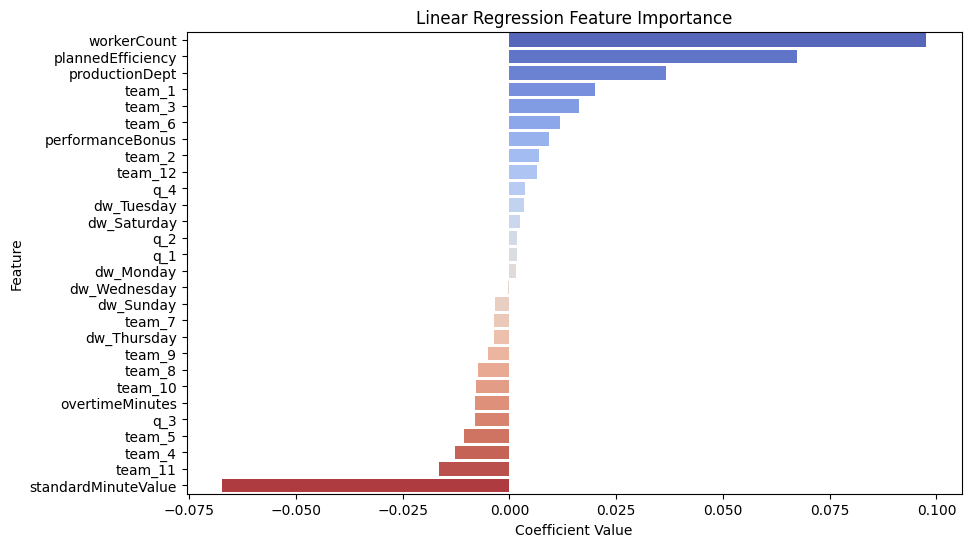

In [198]:

plt.figure(figsize=(10,6))
sns.barplot(x=coef.values, y=coef.index, palette='coolwarm')
plt.title("Linear Regression Feature Importance")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

## **What Increases Your Production Efficiency** 

These are the blue bars. When these features go up, your efficiency tends to go up.

*   **workerCount (Biggest Positive Impact):** This is the strongest positive predictor. It suggests that having more workers on the floor is directly linked to higher production efficiency. This could mean that teams are more effective or balanced when fully staffed.
*   **plannedEfficiency:** This makes sense. When you plan for higher efficiency (setting higher targets), you are more likely to achieve higher efficiency. This shows that goal-setting is effective.
*   **productionDept:** This is likely a one-hot encoded feature. It means that being in this specific department (compared to a baseline department) is associated with higher efficiency.
*   **team\_1, team\_3, team\_6:** These specific teams are consistently more efficient than the baseline team used in your model.
*   **dw\_Tuesday, dw\_Saturday:** Efficiency seems to be slightly higher on Tuesdays and Saturdays compared to the baseline day (e.g., Monday).

---

## **What Decreases Your Production Efficiency**

These are the red bars. When these features go up, your efficiency tends to go down.

*   **standardMinuteValue (SMV) (Biggest Negative Impact):** This is your most important finding. The standardMinuteValue represents the standard time allocated for a specific task or product. Your model is saying that tasks with a higher SMV are strongly associated with lower production efficiency.

    **Why?** This could mean several things:

    *   **Complexity:** Tasks with high SMV (longer, more complex tasks) might be harder to perform efficiently.
    *   **Inaccurate Standards:** The "standard" time set for these complex tasks might be too optimistic or unrealistic, making it impossible for workers to meet the target, which in turn drags down the measured efficiency.
    *   **Ramp-Up Time:** These tasks might require more setup or changeover time, which isn't being performed efficiently (or isn't accounted for in the SMV).
*   **team\_11, team\_4, team\_5, team\_8, etc.:** These teams are consistently less efficient than the baseline team. You can see a clear ranking of team performance here.
*   **overtimeMinutes:** More overtime is linked to lower efficiency. This is a classic business insight. It suggests worker fatigue or that overtime is only used during periods of disruption and low performance.
*   **q\_3:** This likely means "Quarter 3". Your efficiency appears to be lower in the third quarter of the year compared to the baseline quarter (e.g., Q1). This could be due to seasonal factors, holidays, or product mix during that period.

### **Random Forest**

In [199]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  

y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

In [200]:
print("--- Random Forest ---")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_rf)):.3f}")
print(f"Test RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_test_rf)):.3f}")
print(f"Train MAE : {mean_absolute_error(y_train, y_pred_train_rf):.3f}")
print(f"Test MAE  : {mean_absolute_error(y_test, y_pred_test_rf):.3f}")
print(f"Train R2  : {r2_score(y_train, y_pred_train_rf):.3f}")
print(f"Test R2   : {r2_score(y_test, y_pred_test_rf):.3f}")

--- Random Forest ---
Train RMSE: 0.046
Test RMSE : 0.130
Train MAE : 0.028
Test MAE  : 0.081
Train R2  : 0.928
Test R2   : 0.509


In [201]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [202]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)


C:\Users\harsh\AppData\Local\Temp\ipykernel_22780\375273132.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis')


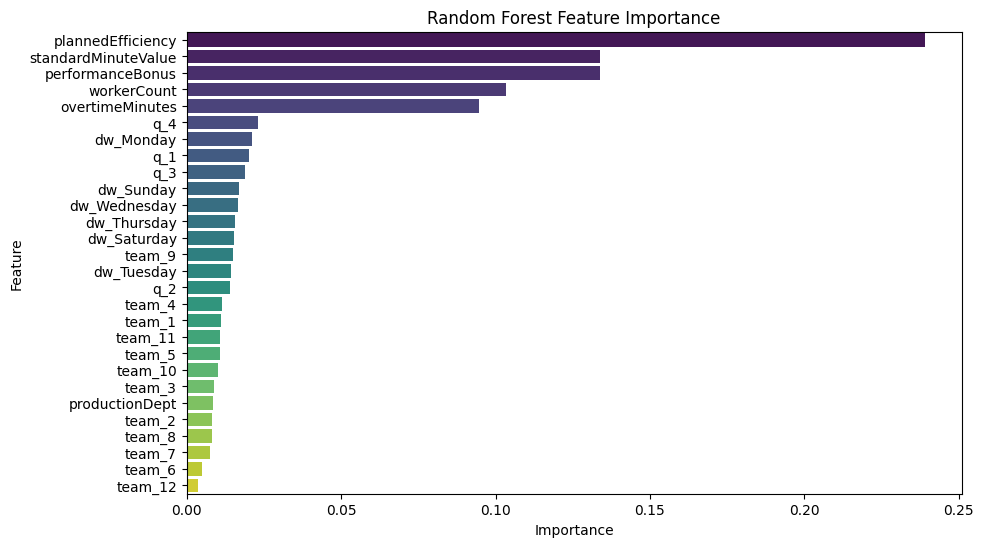

In [203]:

plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## **Key Insights from Your Random Forest Model**

**Clear Top 5:** Your model has a very clear ranking of what drives its predictions:

*   **plannedEfficiency:** This is by far the most important predictor.
*   **standardMinuteValue (SMV):** Confirmed as a top-tier driver.
*   **performanceBonus:** Your model found this highly predictive.
*   **workerCount:** Confirmed as an important factor.
*   **overtimeMinutes:** Confirmed as an important factor.

**Days of the Week (dw_) & Quarters (q_):** These have a secondary level of importance. `q_4` and `dw_Monday` seem to have the most influence of this group.

**Team Features:** All the `team_` features and `productionDept` are at the very bottom. Your Random Forest model concluded that once it knows the SMV, the planned efficiency, and the bonus structure, which team is working doesn't add much new predictive information.

In [204]:
import joblib

In [205]:
feature_cols = X_train.columns
import joblib
joblib.dump(list(feature_cols), r"..\Models\feature_cols.pkl")

['..\\Models\\feature_cols.pkl']

In [206]:
import os
import joblib

save_dir = r"..\Models"
os.makedirs(save_dir, exist_ok=True)

lr_filename = os.path.join(save_dir, "linear_regression_02.pkl")
joblib.dump(lr, lr_filename)
print(f"✅ Saved Linear Regression model to {lr_filename}")

rf_filename = os.path.join(save_dir, "random_forest_02.pkl")
joblib.dump(rf, rf_filename)
print(f"✅ Saved Random Forest model to {rf_filename}")


✅ Saved Linear Regression model to ..\Models\linear_regression_02.pkl
✅ Saved Random Forest model to ..\Models\random_forest_02.pkl


### **Save the scaler for user inputs**

In [207]:
scaler_filename = os.path.join(save_dir, "scaler_lr2.pkl")
joblib.dump(scaler, scaler_filename)
print(f"✅ Saved scaler to {scaler_filename}")

✅ Saved scaler to ..\Models\scaler_lr2.pkl


### **Train, predict, and evaluate**

In [208]:
for name, model in models.items():


    # Scaled Data
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)


    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    print(f"--- {name} ---")
    print(f"Train RMSE: {train_rmse:.3f}, Test RMSE: {test_rmse:.3f}")
    print(f"Train MAE: {train_mae:.3f}, Test MAE: {test_mae:.3f}")
    print(f"Train R2: {train_r2:.3f}, Test R2: {test_r2:.3f}\n")


--- Linear Regression ---
Train RMSE: 0.145, Test RMSE: 0.157
Train MAE: 0.104, Test MAE: 0.113
Train R2: 0.278, Test R2: 0.278

--- Random Forest ---
Train RMSE: 0.046, Test RMSE: 0.130
Train MAE: 0.028, Test MAE: 0.081
Train R2: 0.928, Test R2: 0.509



### **Visualization**

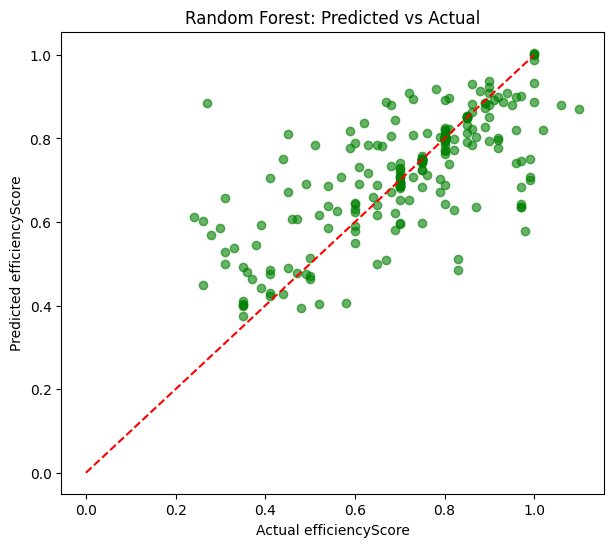

In [209]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_test = rf.predict(X_test)

plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='green')
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('Actual efficiencyScore')
plt.ylabel('Predicted efficiencyScore')
plt.title('Random Forest: Predicted vs Actual')
plt.show()


## **Prediction Mania**

### **Load Models**

In [210]:
import os
print(os.getcwd())

d:\Omnie Solutions\Mark-1\Manufacturing-Team\Notebooks


In [211]:
import os
import joblib

save_dir = r"D:\Omnie Solutions\Mark-1\Manufacturing-Team\Models"
os.makedirs(save_dir, exist_ok=True)

lr_loaded = joblib.load(r"D:\Omnie Solutions\Mark-1\Manufacturing-Team\Models\linear_regression_02.pkl")
scaler_loaded = joblib.load(r"D:\Omnie Solutions\Mark-1\Manufacturing-Team\Models\scaler_lr2.pkl")
rf_loaded = joblib.load(r"D:\Omnie Solutions\Mark-1\Manufacturing-Team\Models\random_forest_02.pkl")
feature_cols = joblib.load(r"..\Models\feature_cols.pkl")


print("✅ Models and scaler loaded successfully")

✅ Models and scaler loaded successfully


### **User Inputs**

In [214]:
print("Enter feature values for prediction:")

user_input = {
    'productionDept': int(input("productionDept (0=Stitching, 1=Finishing): ")),
    'plannedEfficiency': float(input("plannedEfficiency (0 to 1): ")),
    'standardMinuteValue': float(input("standardMinuteValue: ")),
    'overtimeMinutes': int(input("overtimeMinutes: ")),
    'performanceBonus': int(input("performanceBonus: ")),
    'workerCount': int(input("workerCount: "))
}

# Ask for quarters
for q in ['q_1','q_2','q_3','q_4']:
    user_input[q] = int(input(f"{q} (0 or 1): "))

# Ask for team one-hot (team_1 → team_12)
for t in [f"team_{i}" for i in range(1,13)]:
    user_input[t] = int(input(f"{t} (0 or 1): "))

# **Ask for dayOfWeek one-hot (dw_Monday → dw_Sunday)**
for dw in ['dw_Monday','dw_Saturday','dw_Sunday','dw_Thursday','dw_Tuesday','dw_Wednesday']:
    user_input[dw] = int(input(f"{dw} (0 or 1): "))

# Convert user input to DataFrame
user_df = pd.DataFrame([user_input])

# Reindex to match training columns and order
user_df = user_df.reindex(columns=feature_cols, fill_value=0)

# Scale and predict
user_scaled = scaler_loaded.transform(user_df)
lr_pred = lr_loaded.predict(user_scaled)
rf_pred = rf_loaded.predict(user_df)

print("\nPredicted Efficiency Score:")

if lr_pred[0] > rf_pred[0]:
    print(f"Efficiency Score: {lr_pred[0]:.3f}")
else:
    print(f"Efficiency Score: {rf_pred[0]:.3f}")

print(f"\nPredicted Efficiency Score:")
print(f"Linear Regression: {lr_pred[0]:.3f}")
print(f"Random Forest: {rf_pred[0]:.3f}")



Enter feature values for prediction:

Predicted Efficiency Score:
Efficiency Score: 0.882

Predicted Efficiency Score:
Linear Regression: 0.866
Random Forest: 0.882


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,         # Number of random combinations to try
    cv=5,              # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='r2'       # Can also use 'neg_mean_squared_error'
)


rf_random.fit(X_train, y_train)


print("Best parameters:", rf_random.best_params_)
best_rf = rf_random.best_estimator_

y_pred_test = best_rf.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("Test R²:", r2_score(y_test, y_pred_test))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30}
Test R²: 0.49593929402365
Test RMSE: 0.1314815238436032
Test MAE: 0.08186211814574315


In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
# Cross-validation
# cv_results_lr = cross_validate(lr, X, y, cv=5, scoring=scoring)
# cv_results_rf = cross_validate(rf, X, y, cv=5, scoring=scoring)

# # Print mean scores
# print("Linear Regression CV results:")
# print(f"R2: {np.mean(cv_results_lr['test_R2']):.3f}")
# print(f"RMSE: {np.mean(cv_results_lr['test_RMSE']):.3f}")
# print(f"MAE: {abs(np.mean(cv_results_lr['test_MAE'])):.3f}\n")

# print("Random Forest CV results:")
# print(f"R2: {np.mean(cv_results_rf['test_R2']):.3f}")
# print(f"RMSE: {np.mean(cv_results_rf['test_RMSE']):.3f}")
# print(f"MAE: {abs(np.mean(cv_results_rf['test_MAE'])):.3f}")